## POLINOMIO INTERPOLANTE DIFERENCIAS DIVIDIDAS DE NEWTON
Dado los n+1 nodos $(x_{i},f(x_{i}))$ donde $i = 0,1,2,3...n$ existen n+1 contantes $C_{0},C_{1},C_{2}...C_{n}$, determinada en la forma unica, tales que el polinomio $P(x)$ de grado $\leq$.
Exisistira por lo menos un polinomio interpolante que pase por los nodos establecidos
<img src="img/interpolante.png" width="30%" height="30%">
definido por la siguiente manera:
$$P(x) = C_{0} + C_{1}(x-x_{0}) + C_{2}(x-x_{0})(x-x_{1}) +...+ C_{n}(x-x_{0})(x-x_{n})$$
### DETERMINACION DE CONSTANTES:
$$ P(x_{0})=C_{0}=f[x_{0}] $$

$$ P(x_{1})=f[x_{0}] + C_{1}(x_{1}-x_{0}) = f(x_{i}) $$

<center>$ C_{1} = \frac{f(x_{1})-f(x_{0}))}{x_{1}-x_{0}} = f[x_{0},x_{1}]$ ( Primera diferencia dividida referida $[x_{0},x_{1}]$) </center>

Donde: $ f[x_{0},x_{1}] $ Es la primera diferencia dividida referida
En terminos generales la forma para obtener la primera diferencia dividida de $f$ respecto a $x_{i}+x_{i+1}$

$$ f[x{i},x_{i+1}] = \frac{f[x_{i+1}]-f[x_{i}]}{x_{i+1}-x_{i}} $$

para visualizar de mejor manera la obtención de las diferencias divididas, a continuación se presenta una tabla en la cual se obtienen de manera piramidal:

|$x_{i}$| $f(x_{i})$ | 1 | 2 | 3 |
|---|---|---|---|---|
|$x_{0}$|$ f[x_{0}] $|0|0|0|
|$x_{1}$|$ f[x_{1}] $|$f[x_{0},x_{1}]$|0|0|
|$x_{2}$|$ f[x_{2}] $|$f[x_{1},x_{2}]$|$f[x_{0},x_{1},x_{2}]$|0|
|$x_{3}$|$ f[x_{3}] $|$f[x_{2},x_{3}]$|$f[x_{0},x_{1},x_{2}]$|$f[x_{0},x_{1},x_{2},x_{3}]$|

Al desarrollar cada una de las diferencias divididas referenciadas, se genera el siguiente interpolante:

$$P(x)=f[x_{0}]+\sum_{k=1}^{h}(f[x_{0},...,x_{k}])(\prod_{j=0}^{k-1}(x-x_{j}))$$





In [2]:
%matplotlib inline
from sympy import *;
from numpy import *;
from ipywidgets import widgets
import math
from IPython.display import display, Math, Latex
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import pylab
import pandas as pd


init_printing()
x = Symbol('x')
gx = Function('gx')(x)

In [3]:
option_drop = widgets.Dropdown(
            options={'Función y valores en x':1,'Valores x y valores y':2},
            value=1,
            description='Seleccionar:',
        )
display(option_drop)

Dropdown(description='Seleccionar:', options={'Función y valores en x': 1, 'Valores x y valores y': 2}, value=…

In [4]:
if option_drop.value==1:
    print("Ingrese los valores en x:")
    text_x=widgets.Text();
    
    display(text_x)
    print("Ingrese funcion f(x)=")
    text_function=widgets.Text()
    display(text_function)
else:
    print("Ingrese los valores en x:")
    text_x=widgets.Text();
    display(text_x)
    print("Ingrese los valores en y:")
    text_y=widgets.Text()
    display(text_y)


Ingrese los valores en x:


Text(value='')

Ingrese funcion f(x)=


Text(value='')

In [6]:
if option_drop.value==1:
    try:
        yi=[]
        gx = sympify(text_function.value)
        for i in range(0,len(xi)):
            yi.append(gx.subs(x,xi[i]));
    except:
        display(HTML("<h3 style='color:red'>Error en los datos, porfavor verificar funcion.</h3>")); 
    xi = text_x.value.split(",")
    xi = set(xi)
else:
    xi = text_x.value.split(",")
    xi = set(xi)
    yi= text_y.value.split(",")
    
try:
    xi = list(map(float, xi))
    yi = list(map(float, yi))
    xi = sorted(xi)
except:
    display(HTML("<h3 style='color:red'>Error en los datos, porfavor verificar que sean valores numericos.</h3>"));

In [7]:
try:
    F = zeros(shape=(len(xi),len(xi)));
    diffDiv = []
    for i in range(0,len(xi)):
        vect = []
        for j in range(0,len(xi)):
            if i>=j:
                if j==0:
                    F[i,j]=yi[i]
                else:
                    F[i,j] = (round(F[i,j-1],12) - round(F[i-1,j-1],12))/(round(xi[i],12) - round(xi[i-j],12))
                vect.append(F[i,j]);
            else:
                vect.append(F[i,j]);
        diffDiv.append(vect)
    
    diffDivSort =[];
    for i in range(0,len(diffDiv)):
        values =[]
        for j in range(0,len(diffDiv)):
            values.append(diffDiv[j][i]);
        diffDivSort.append(values)
    
    
    
    cols = [0]*(len(xi)+1);
    for i in range(0,len(cols)):
        cols[i] = str(i)


    keys = ['xi','f[0]'];
    for i in range(0,len(xi)-1):
        keys.append(str(i+1))

    values = [xi,yi]
    for i in range(1,len(diffDivSort)):
        values.append(diffDivSort[i])

    d={};
    for i in range(0,len(keys)):
        d1 = {keys[i]:values[i]}
        d.update(d1)


    df = pd.DataFrame(d)
    
    display(HTML("<h3>Tabla de diferencias dividas de newton</h3>"))
    display(df)
    
    
    coeficientes = F.diagonal()
    f = Function('f')(x)
    f = 0;
    mx = 1;
    for i in range(0,len(coeficientes)):
        for j in range(0,i):
            mx = mx*(x-xi[j])
        f = f + coeficientes[i]*mx
        mx = 1
    
    f = simplify(f)
    
    display(Math("P(x)="+latex(f)))
except:
    display(HTML("<h2 style='color:red'>Error! porfavor verificar datos anteriores</h2>"))
    


,xi,f[0],1,2,3,4,5
0,1.0,-3.0,0.0,0.0,0.0,0.0,0.0
1,2.0,4.0,7.0,0.0,0.0,0.0,0.0
2,3.0,23.0,19.0,6.0,0.0,0.0,0.0
3,4.0,60.0,37.0,9.0,1.0,0.0,0.0
4,5.0,121.0,61.0,12.0,1.0,0.0,0.0
5,6.0,212.0,91.0,15.0,1.0,0.0,0.0


<IPython.core.display.Math object>

In [8]:
if len(xi)==len(yi):
    print("Evaluar polinomio en un punto")
    text_value = widgets.BoundedFloatText(
        value=0.0,
        step=0.1,
        description='x:',
        disabled=False
    )
    display(text_value)



Evaluar polinomio en un punto


BoundedFloatText(value=0.0, description='x:', step=0.1)

In [9]:
if len(xi)==len(yi):
    if(text_value != ""):
        display(Math("P("+latex(text_value.value)+")="+latex(f.subs(x,text_value.value))))

<IPython.core.display.Math object>

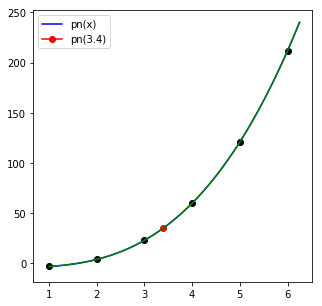

In [10]:
try:
    h = abs(xi[0]-xi[len(xi)-1])/2
    eps = h/10
    fig,ax = plt.subplots(figsize=(5,5))
    f_l = lambdify(x,f)
    xv = linspace(xi[0],xi[len(xi)-1]+eps,50)
    ax.plot(xv, f_l(xv),color='blue');
    ax.scatter(xi,yi,color='black', marker='o');
    ax.plot(text_value.value,f.subs(x,text_value.value), color ='red',marker='o');
    if(gx!=""):
        g_l = lambdify(x,gx)
        ax.plot(xv, g_l(xv),color='green');
    ax.legend(["pn(x)","pn("+ str(text_value.value) +")"]);
except:
    display(HTML("<h2 style='color:red'>Algo ocurrio mal, porfavor verifica los datos introducidos</h2>"))
